# **1. Perkenalan Dataset**


**Sumber :** Kaggle  
**Predict the Introverts from the Extroverts Datasets**
File ini berisi 18524 data latih dan 6175 data tes berkaitan dengan perilaku sosial dan ciri-ciri kepribadian, yang dirancang untuk mengeksplorasi dan mengklasifikasikan individu sebagai Ekstrovert atau Introvert.

URL : [Predict the Introverts from the Extroverts](https://www.kaggle.com/competitions/playground-series-s5e7)


# **2. Import Library**

In [521]:
# Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

In [522]:
# Type your code here
df = pd.read_csv("../predict_the_introverts_from_the_extroverts_raw/train.csv")
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [523]:
df.tail(3)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert
18523,18523,1.0,No,8.0,6.0,No,4.0,7.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [524]:
# Type your code here
print(f"Number of Column: {df.shape[1]}")
print(f"Number of Row: {df.shape[0]}\n")

df.info()

Number of Column: 9
Number of Row: 18524

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [525]:
# features
numerical_features = df.select_dtypes(include=np.number).columns
print(f"Numerical Features: {len(numerical_features)}")

Numerical Features: 6


In [526]:
categorical_features = df.select_dtypes(include=np.object_).columns
print(f"Categorical Features: {len(categorical_features)}")

Categorical Features: 3


## Numeric EDA

In [527]:
# descriptive statistics
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [528]:
# correlations
corr = df[numerical_features].corr()
corr

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
id,1.000000,-0.000004,0.002750,0.004460,0.004340,-0.001945
Time_spent_Alone,-0.000004,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,0.002750,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,0.004460,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,0.004340,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.001945,-0.611544,0.566679,0.579305,0.522272,1.000000


<Axes: >

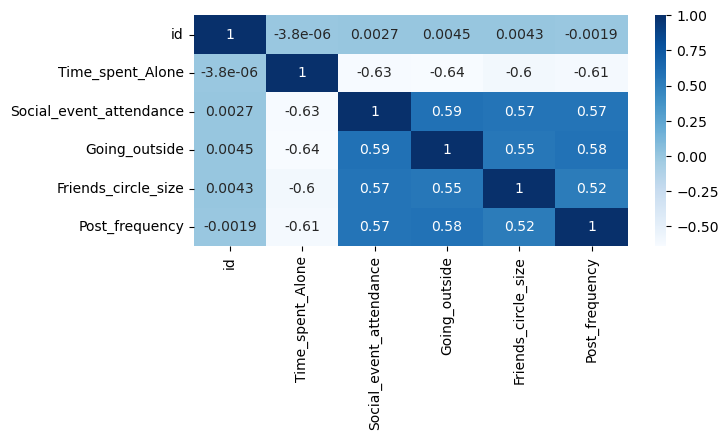

In [529]:
# heatmap visualization
plt.figure(figsize=(7, 3))
sns.heatmap(corr, annot=True, cmap="Blues")

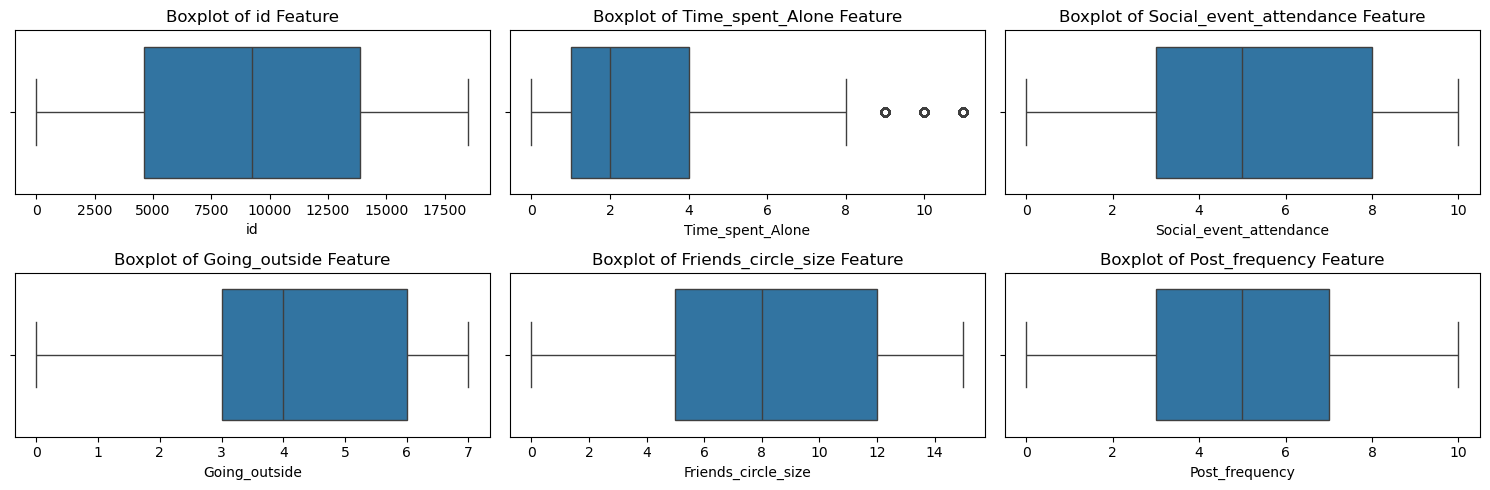

In [530]:
# outlier check
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

# boxplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))

for ax, col in zip(axes.flatten(), numerical_features):
    sns.boxplot(df, x=col, ax=ax)
    ax.set_title(f"Boxplot of {col} Feature")

plt.tight_layout()
plt.show()

## Categoric EDA

In [531]:
df[categorical_features].nunique()

Stage_fear                   2
Drained_after_socializing    2
Personality                  2
dtype: int64

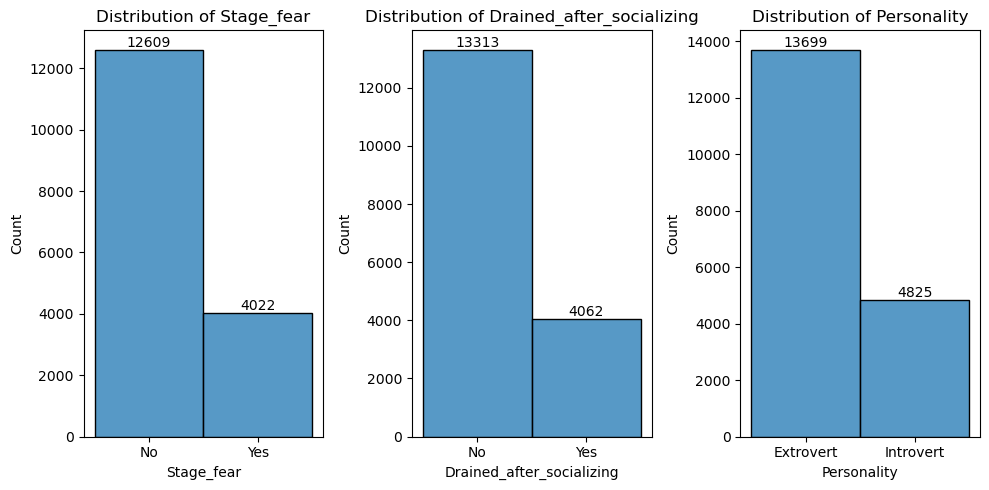

In [532]:
n_cols = 3
n_rows = int(np.ceil(len(categorical_features) / n_cols))

# histogram
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))

for ax, col in zip(axes.flatten(), categorical_features):
    sns.histplot(
        data=df,
        x=col,
        ax=ax,
    )
    ax.set_title(f"Distribution of {col}")

    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## train data

In [533]:
# missing value
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [534]:
df = df.dropna()
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [535]:
# duplicate
df.duplicated().sum()

np.int64(0)

In [536]:
# separate features and target
X = df.drop(columns=["id", "Personality"], axis=1)
y = df["Personality"]
id = df["id"]

numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=np.object_).columns

In [537]:
# preprocessing pipeline
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore")

# transformer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", scaler)]
)

categoric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", encoder)]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numerical_features),
        ("categoric", categoric_transformer, categorical_features),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

In [538]:
# feature preprocessing
preprocessor.fit(X)
X_preprocessed = preprocessor.transform(X)
X_preprocessed = pd.DataFrame(
    X_preprocessed, columns=preprocessor.get_feature_names_out()
)
X_preprocessed.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,-1.001004,0.122633,-0.236003,1.595076,-0.184829,1.0,0.0,1.0,0.0
1,-0.620847,0.507691,-0.766592,0.367511,0.922299,1.0,0.0,1.0,0.0
2,0.139467,0.507691,-0.766592,0.613024,-0.184829,1.0,0.0,1.0,0.0
3,-0.240690,0.892749,-0.766592,-1.105568,-0.184829,1.0,0.0,1.0,0.0
4,-0.620847,0.892749,0.825176,1.349563,1.291341,1.0,0.0,1.0,0.0


In [539]:
# target preprocessing
le = LabelEncoder()
y_preprocessed = le.fit_transform(y)
y_preprocessed = pd.DataFrame(y_preprocessed, columns=["Personality"])
y_preprocessed.value_counts()

Personality
0              8422
1              1767
Name: count, dtype: int64

In [540]:
# combine preprocessed features and target
df_preprocessed = pd.concat(
    [id.reset_index(drop=True), X_preprocessed, y_preprocessed], axis=1
)
df_preprocessed["id"] = df_preprocessed["id"].astype(int)
df_preprocessed.head()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Personality
0,0,-1.001004,0.122633,-0.236003,1.595076,-0.184829,1.0,0.0,1.0,0.0,0
1,1,-0.620847,0.507691,-0.766592,0.367511,0.922299,1.0,0.0,1.0,0.0,0
2,3,0.139467,0.507691,-0.766592,0.613024,-0.184829,1.0,0.0,1.0,0.0,0
3,7,-0.240690,0.892749,-0.766592,-1.105568,-0.184829,1.0,0.0,1.0,0.0,0
4,9,-0.620847,0.892749,0.825176,1.349563,1.291341,1.0,0.0,1.0,0.0,0


In [541]:
# convert to csv
df_preprocessed.to_csv(
    "../preprocessing/predict_the_introverts_from_the_extroverts_preprocessing/train_preprocessing.csv",
    index=False,
)

## test data

In [542]:
# load data
df_test = pd.read_csv("../predict_the_introverts_from_the_extroverts_raw/test.csv")
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [543]:
# missing value
df_test.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [544]:
df_test = df_test.dropna()
df_test.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [545]:
# duplicate
df_test.duplicated().sum()

np.int64(0)

In [546]:
# separate id
df_test_id = df_test["id"]
df_test = df_test.drop(columns=["id"])

In [547]:
# transform
df_test_preprocessed = preprocessor.transform(df_test)
df_test_preprocessed = pd.DataFrame(
    df_test_preprocessed, columns=preprocessor.get_feature_names_out()
)
df_test_preprocessed.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.139467,-0.262424,0.825176,1.595076,1.291341,1.0,0.0,1.0,0.0
1,0.139467,-0.647482,-0.236003,-0.860055,0.184213,1.0,0.0,1.0,0.0
2,2.420409,-1.802655,-1.297181,-1.842107,-1.661000,0.0,1.0,0.0,1.0
3,-0.240690,-0.262424,-0.766592,0.367511,-0.553872,1.0,0.0,1.0,0.0
4,0.139467,-0.647482,0.294587,1.595076,-0.184829,1.0,0.0,1.0,0.0


In [548]:
# combine features with id
df_test_preprocessed = pd.concat(
    [df_test_id.reset_index(drop=True), df_test_preprocessed], axis=1
)
df_test_preprocessed["id"] = df_test_preprocessed["id"].astype(int)
df_test_preprocessed.head()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,18526,0.139467,-0.262424,0.825176,1.595076,1.291341,1.0,0.0,1.0,0.0
1,18527,0.139467,-0.647482,-0.236003,-0.860055,0.184213,1.0,0.0,1.0,0.0
2,18528,2.420409,-1.802655,-1.297181,-1.842107,-1.661000,0.0,1.0,0.0,1.0
3,18529,-0.240690,-0.262424,-0.766592,0.367511,-0.553872,1.0,0.0,1.0,0.0
4,18530,0.139467,-0.647482,0.294587,1.595076,-0.184829,1.0,0.0,1.0,0.0


In [549]:
# convert to csv
df_test_preprocessed.to_csv(
    "../preprocessing/predict_the_introverts_from_the_extroverts_preprocessing/test_preprocessing.csv",
    index=False,
)